# Equation used for the flip angle method
###### Reference: Fram, E.K., Herfkens, R.J., Johnson, G.A., Glover, G.H., Karis, J.P., Shimakawa, A., Perkins, T.G., Pelc, N.J., 1987. Rapid calculation of T1 using variable flip angle gradient refocused imaging. Magn. Reson. Imaging 5, 201?208

$$I(\theta)=\frac{N(H)(1-e^{-TR/T1})sin(\theta)}{1-e^{-TR/T1}e^{-TR/T2^{*}}-cos(\theta)(e^{-TR/T1}-e^{-TR/T2^{*}})}$$

##### When TR>>T2*

$$I(\theta)=\frac{N(H)(1-e^{-TR/T1})sin(\theta)}{1-cos(\theta)e^{-TR/T1}}$$

# Equation 1

##### Correcting for the decay of T2* 

$$I(\theta)=\frac{N(H)(1-e^{-TR/T1})sin(\theta)}{1-cos(\theta)e^{-TR/T1}}e^{-TE/T2^{*}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from ipywidgets import interact, interactive, fixed, interact_manual

## Simulation based on Equation 1. Varying TR and T1 separately.

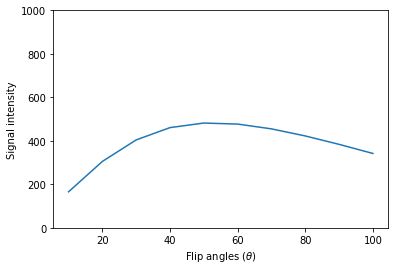

(1000, 25, 50, 12.5, 500)

<function __main__.Signal_function(N, TR, T1, TE, T2star)>

In [7]:
def Signal_function(N,TR,T1,TE,T2star):
    #Signal intensity vs angle, ranging from 10 to 100 degrees
    #Parameters are later passed to the function varying TR and T1 separately
    plt.plot(np.arange(10,110,10), (N*(1 - np.exp(-TR/T1))*np.sin(np.arange(10,110,10)*np.pi/180))*np.exp(-TE/T2star)/(1-np.cos(np.arange(10,110,10)*np.pi/180)*np.exp(-TR/T1)))
    plt.xlabel('Flip angles '  r'($\theta$)')
    plt.ylabel('Signal intensity')
    plt.ylim(0,1000)
    return (N, TR,T1,TE,T2star)
interact(Signal_function, N=fixed(1000), TR=(20,30,5), T1=(10,90,10), TE=fixed(12.5), T2star=fixed(500))

## Simulation based on Equation 1. Varying TR/T1.

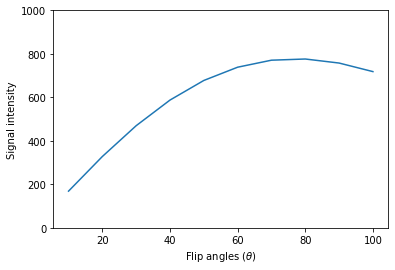

<function __main__.Signal_function(N, ratio_trt1, TE, T2star)>

In [3]:
def Signal_function(N,ratio_trt1,TE,T2star):
    #Signal intensity vs angle, ranging from 10 to 100 degrees
    #Parameters are later passed to the function varying the ratio TR/T1 separately
    plt.plot(np.arange(10,110,10), (N*(1 - np.exp(-ratio_trt1))*np.sin(np.arange(10,110,10)*np.pi/180))*np.exp(-TE/T2star)/(1-np.cos(np.arange(10,110,10)*np.pi/180)*np.exp(-ratio_trt1)))
    plt.xlabel('Flip angles '  r'($\theta$)')
    plt.ylabel('Signal intensity')
    plt.ylim(0,1000)
interact(Signal_function, N=fixed(1000), ratio_trt1=(0.25,3,0.25), TE=fixed(12.5), T2star=fixed(500))

## Linearization of Equation 1 to obtain Equation 2.

$$\frac{I(\theta)}{sin(\theta)}=e^{-TR/T1}\frac{I(\theta)}{tan(\theta)}+N(H)(1-e^{-TR/T1})e^{-TE/T2^{*}}{}$$

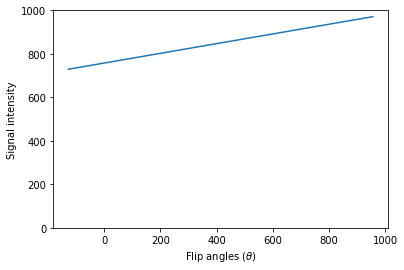

(array([ 9.56319889e+02,  9.00886994e+02,  8.13345801e+02,  7.00087653e+02,
         5.68582062e+02,  4.26417759e+02,  2.80555442e+02,  1.36874654e+02,
         4.63950616e-14, -1.26663564e+02]),
 array([971.07266526, 958.70391438, 939.17083392, 913.89952527,
        884.55666177, 852.83551802, 820.28923587, 788.22971868,
        757.68885516, 729.42639384]))

<function __main__.Linear_function(N, ratio_trt1, TE, T2star)>

In [4]:
def Linear_function(N,ratio_trt1,TE,T2star):
    #I(theta)/tan(theta)
    abs_values = ((N*(1 - np.exp(-ratio_trt1))*np.sin(np.arange(10,110,10)*np.pi/180))*np.exp(-TE/T2star)/(1-np.cos(np.arange(10,110,10)*np.pi/180)*np.exp(-ratio_trt1)))/np.tan(np.arange(10,110,10)*np.pi/180)
    #I(theta)/sin(theta)
    ord_values = ((N*(1 - np.exp(-ratio_trt1))*np.sin(np.arange(10,110,10)*np.pi/180))*np.exp(-TE/T2star)/(1-np.cos(np.arange(10,110,10)*np.pi/180)*np.exp(-ratio_trt1)))/np.sin(np.arange(10,110,10)*np.pi/180)
    plt.plot(abs_values,ord_values)
    plt.xlabel('Flip angles '  r'($\theta$)')
    plt.ylabel('Signal intensity')
    plt.ylim(0,1000)
    return abs_values,ord_values

interact(Linear_function, N=fixed(1000), ratio_trt1=(0.25,3,0.25), TE=fixed(12.5), T2star=fixed(500))

##### T1 is calculated using the slope of the fitted line